In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L_x = 100
g = 9.81
H = 100

N_x = 301
dx = L_x/(N_x - 1)
dt = 0.002
N_t = 50000
err = 1e-4
x = np.linspace(0,L_x,N_x)
h = np.zeros(N_x)
u = np.zeros(N_x)
D = 100
slope = lambda x: 0.7*(x>700)*(x-700)
# slope = lambda x: 0.2*x

b = slope(x)
H = D - b
b_ = np.zeros(N_x)
# b = np.zeros(N_x)
# h = 10*np.exp(-((x)**2/(2*(0.05E+3)**2)))
h[int(1*N_x/16):int(2*N_x/8)] = 50
nu = 0.01

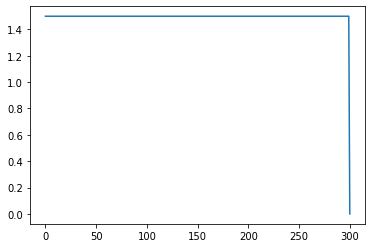

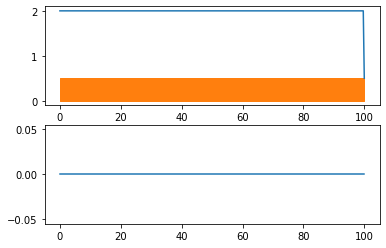

In [3]:
h = np.ones(N_x)*0.5

h[:300]= 2
slope = lambda x,b,L: (x>=b)*(x-b)*(L/(L_x-b))
dam  = lambda x,a,b,L: ((x>=a)&(x<=b))*L

u = np.zeros(N_x)
z = np.ones(N_x)*0.5
s = slope(x,90,2)
d = dam(x,20,30,3)
z = z
z_ = np.zeros(N_x)

h = np.where(h>=z,h-z,0)
plt.plot(h)
plt.show()
# z[150:200]=0
fig, (axh,axu) = plt.subplots(2, 1,facecolor ='white')
line_u,=axu.plot(x,u)
line_h,=axh.plot(x,h+z)
fill_=axh.fill_between(x,z,z_,color ='tab:orange')

In [4]:
N_x = 200-1 # for Fx,and Px
N_z = 200-1  # for Fz,and Pz

U_x = N_x + 2 
U_z = N_z

W_x = N_x
W_z = N_z + 2

L_x = 100
L_z = 100

# U = np.zeros((U_x,U_y+2)) # N_x+2, N_y    , N_x [0,last] =0,and if you N_y +2 for convinient, so -1, max+ 1 also 0 for BC
# V = np.zeros((V_x+2,V_y)) # N_x  , N_y + 2, N_y [0,last] =0,and if you N_x +2 for convinient, so -1, max+ 1 also 0 for BC


# x = np.linspace(0,L_x,U_x,endpoint=True) # contain the boundary, make the all area
# y = np.linspace(0,L_y,V_y,endpoint=True) # contain the boundary, make the all area
# X,Y = np.meshgrid(x,y,indexing='ij')



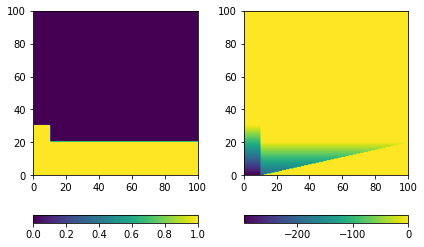

In [10]:
U = np.zeros((U_x,U_z+2)) # N_x+2, N_z    , N_x [0,last] =0,and if you N_z +2 for convinient, so -1, max+ 1 also 0 for BC
W = np.zeros((W_x+2,W_z)) # N_x  , N_z + 2, N_z [0,last] =0,and if you N_x +2 for convinient, so -1, max+ 1 also 0 for BC


x = np.linspace(0,L_x,U_x,endpoint=True) # contain the boundary, make the all area
z = np.linspace(0,L_z,W_z,endpoint=True) # contain the boundary, make the all area
X,Z = np.meshgrid(x,z,indexing='ij')
dx, dz = L_x/(N_x-1), L_z/(N_z-1)
slope = lambda x,b,L: (x>=b)*(x-b)*(L/(L_x-b))
B_X = slope(X,10,20)
# plt.plot(x,slope(x,0,20))
height = lambda x,b,h1,h2: (x<=b)*(h1) + (x>b)*(h2)
H_X = height(X,10,30,20)
BC = np.where(((X==0)|(X == L_x)|(Z==0)|(Z==L_z)))
FC = np.where(((X==0)|(Z==0)|(Z<=H_X)|(Z<=B_X)))
FC_not = np.where(~((X==0)|(X == L_x)|(Z==0)|(Z==L_z)|(Z<=H_X)|(Z<=B_X)))
TC = np.where(((X==0)|(Z==0)|(Z<=B_X))|(((Z==L_z)|(X==L_x)))) # Topology condition

HC = np.where((Z<=H_X)&(Z>B_X))

# plt.imshow(x, height(x,10,10,20))
# plt.imshow(H_x.T,vmin=0, vmax= 100)
F = np.zeros_like(U)
F[FC] = 1
# F[HC] = 1
plt.subplot(121)
plt.imshow(F.T,extent=[0,L_x,0,L_z],origin='lower')
plt.colorbar(orientation="horizontal")
# set pressure by height
P = np.zeros_like(U)
P = -g*dz*0.1*P
P[HC] = -g*dz
# P[TC_not] = 0
for i in range(N_z-1,0,-1):

    P[:,i-1]+=P[:,i]
P[TC] = 0
plt.subplot(122)
plt.imshow(P.T[1:,1:],extent=[0,L_x,0,L_z],origin='lower')
plt.colorbar(orientation="horizontal")
plt.tight_layout()

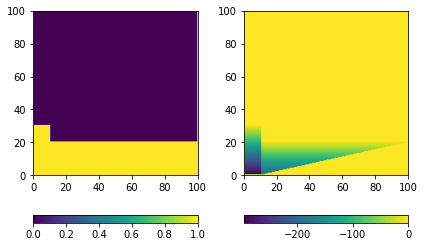

In [12]:
# set pressure by height

F = np.zeros_like(U)
F[TC] = 1
F[HC] = 1
# BC = np.where(Y<B_X)
# U[BC] = 0
plt.subplot(121)
plt.imshow(F.T,extent=[0,L_x,0,L_z],origin='lower')
plt.colorbar(orientation="horizontal")
# set pressure by height
P = np.zeros_like(U)
P[HC] = -g*dz
# P[TC_not] = 0
for i in range(N_z-1,-1,-1):P[:,i-1]+=P[:,i]
P[TC] = 0
plt.subplot(122)
plt.imshow(P.T,extent=[0,L_x,0,L_z],origin='lower')
plt.colorbar(orientation="horizontal")
plt.tight_layout()

In [13]:
from numba import jit

In [14]:
def padding_2D(UC,axis='x',HOW ='edge'):
    if axis == 'x':
        if HOW == 'constant':
            U_pad = np.pad(UC,((1,1),(0,0)),'constant',constant_values = 0)
        else:
            U_pad = np.pad(UC,((1,1),(0,0)),'edge')
        UW = U_pad[:-2,:]
        UE = U_pad[2:,:]
        return UW,UC,UE
    if axis == 'z':
        if HOW == 'constant':
            U_pad = np.pad(UC,((0,0),(1,1)),'constant',constant_values = 0)
        else:
            U_pad = np.pad(UC,((0,0),(1,1)),'edge')
        UN = U_pad[:,2:]
        US = U_pad[:,:-2]
        return US,UC,UN


def set_dt(U,W,dx,dz,dt,c_num,err=1e-5):
    dx_u = dx/np.max(U)
    dz_w = dz/np.max(W)
    newdt = min(c_num*dx_u,c_num*dz_w,dt)
    newdt = max(newdt,err)
    return newdt

def NS_solver(U,W,P,F,dx,dz,dt,nu,beta0=1.7,c_num = 0.7,g=g):

    # UC[TC] = 0
    # WC[TC] = 0
    
    PN = P.copy()
    UW,UC,UE = padding_2D(U.copy(),'x','constant')
    US,UC,UN = padding_2D(U.copy(),'z','constant')
    WW,WC,WE = padding_2D(W.copy(),'x','constant')
    WS,WC,WN = padding_2D(W.copy(),'z','constant')
    
    UiC = (UC + UW)/2
    UiCE = (UE + UC)/2
    WiC = (WC + WS)/2
    WiCN = (WN + WC)/2
    UUup = np.where(UiC>=0,UW,UC)
    UUupE = np.where(UiCE>=0,UC,UE)
    
    FUX = (UiCE*UUupE - UiC*UUup)*dx
    
    UWup = np.where(WiC>=0,US,UC)
    UWupN = np.where(WiCN>=0,UC,UN)
    
    FUZ = (WiCN*UWupN-WiC*UWup)*dz
    

    WUup = np.where(UiC>=0,WW,WC)
    WUupE = np.where(UiCE>=0,WC,WE)
    
    FWX = (UiCE*WUupE - UiC*WUup)*dx
    
    Wup = np.where(WiC>=0,WS,WC)
    WupN = np.where(UiCE>=0,WC,WN)
    
    FWZ = (WiCN*WupN-WiC*Wup)*dz
    
    VISX = nu*((1/(dx*dx))*(UE - 2*UC + UN) + (1/(dz*dz))*(UN - 2*UC + UW))
    VISZ = nu*((1/(dx*dx))*(WE - 2*WC + WN) + (1/(dz*dz))*(WN - 2*WC + WW))
    
    PW,PC,PE = padding_2D(P.copy(),'x','constant')
    PS,PC,PN = padding_2D(P.copy(),'z','constant')
    PX = (PC - PW)/dx
    PZ = (PC - PS)/dz
    
    U = UC + dt*(-PX - FUX - FUZ + VISX) 
    W = WC + dt*(-PZ - FWX - FWZ + VISZ - g) 
    
    # UW,UC,UE = padding_2D(U.copy(),'x','constant')
    # WS,WC,WN = padding_2D(W.copy(),'z','constant')
    # D = (-(1/dx)*(UC - UW) + (1/dz)*(WC-WS))
    # beta = beta0/(2*dt*(1/(dx*dx) + 1/(dz*dz)))
    # dP = beta*D
    # dPW,dPC,dPE = padding_2D(dP,'x','constant')
    # dPS,dPC,dPN = padding_2D(dP,'z','constant')
    # P = PN+dP
    # # P[TC] = 0
    # U = UC + (dt/dx)*(dPC - dPW)
    # W = WC + (dt/dz)*(dPC - dPS)
    
    new_dt = set_dt(U,W,dx,dz,dt,c_num)
    
    P[TC] = 0
    U[TC] = 0
    W[TC] = 0
    # U[TC]=-U[TC[0],TC[1]+1] 

    # W[TC]=-W[TC[0]+1,TC[1]] 
    return U,W,P,new_dt
    

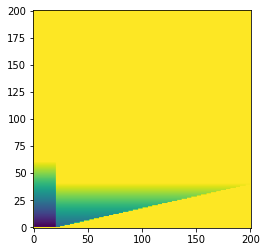

In [15]:
UW,UC,UE = padding_2D(U.copy(),'x')
WS,WC,WN = padding_2D(W.copy(),'z')
PN = P.copy()
D = (-(1/dx)*(UC - UW) + (1/dz)*(WC-WS))
beta0 = 1.7
beta = beta0/(2*dt*(1/(dx*dx) + 1/(dz*dz)))
dP = beta*D
plt.imshow((PN).T, origin='lower')

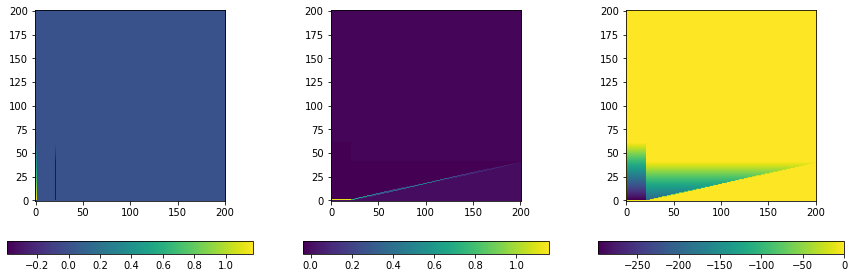

In [19]:
Unew,Wnew,Pnew, newdt = NS_solver(U,W,P,F,dx,dz,dt,nu,1e-6,c_num=0.1)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(Unew.T,origin='lower')
plt.colorbar(orientation="horizontal")
plt.subplot(132)
plt.imshow(Wnew.T,origin='lower')
plt.colorbar(orientation="horizontal")
plt.subplot(133)
plt.imshow(Pnew.T,origin='lower')
plt.colorbar(orientation="horizontal")

In [20]:
T_list =[]

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\3377654964.py:61: RuntimeWarning: overflow encountered in multiply
  FWZ = (WiCN*WupN-WiC*Wup)*dz
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\3377654964.py:61: RuntimeWarning: invalid value encountered in subtract
  FWZ = (WiCN*WupN-WiC*Wup)*dz
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\3377654964.py:40: RuntimeWarning: invalid value encountered in add
  WiC = (WC + WS)/2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\3377654964.py:41: RuntimeWarning: invalid value encountered in add
  WiCN = (WN + WC)/2
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\3377654964.py:50: RuntimeWarning: invalid value encountered in multiply
  FUZ = (WiCN*UWupN-WiC*UWup)*dz
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\3377654964.py:56: RuntimeWarning: invalid value encountered in multiply
  FWX = (UiCE*WUupE - UiC*WUup)*dx
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\3377654964.py:61: RuntimeWarning: invalid value encountered in

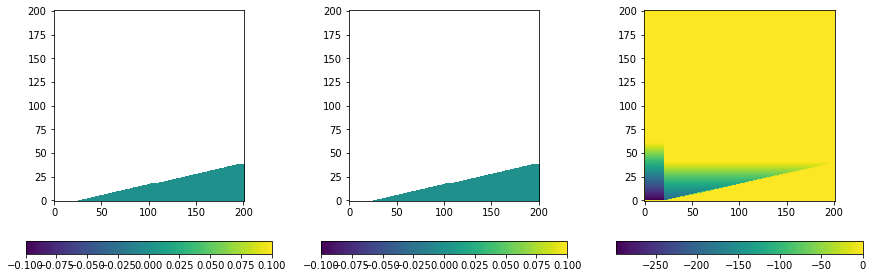

In [22]:
for i in range(1000):
    T_list.append(newdt)
    Unew,Wnew,Pnew, newdt = NS_solver(Unew,Wnew,Pnew,F,dx,dz, newdt,nu,1e-6,c_num=0.1)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(Unew.T,origin='lower')
plt.colorbar(orientation="horizontal")
plt.subplot(132)
plt.imshow(Wnew.T,origin='lower')
plt.colorbar(orientation="horizontal")
plt.subplot(133)
plt.imshow(Pnew.T,origin='lower')
plt.colorbar(orientation="horizontal")


In [ ]:
plt.plot(np.cumsum(T_list))

In [24]:
N_x = 51 # for Fx,and Px
N_z = 51  # for Fz,and Pz

U_x = N_x  
U_z = N_z

W_x = N_x
W_z = N_z 

L_x = 100
L_z = 50

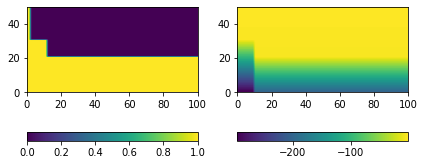

In [25]:
U = np.zeros((U_x,U_z)) # N_x+2, N_z    , N_x [0,last] =0,and if you N_z +2 for convinient, so -1, max+ 1 also 0 for BC
W = np.zeros((W_x,W_z)) # N_x  , N_z + 2, N_z [0,last] =0,and if you N_x +2 for convinient, so -1, max+ 1 also 0 for BC


x = np.linspace(0,L_x,U_x,endpoint=True) # contain the boundary, make the all area
z = np.linspace(0,L_z,W_z,endpoint=True) # contain the boundary, make the all area
X,Z = np.meshgrid(x,z,indexing='ij')
dx, dz = L_x/(N_x-1), L_z/(N_z-1)
slope = lambda x,b,L: (x>=b)*(x-b)*(L/(L_x-b))
B_X = slope(X,0,0)
# plt.plot(x,slope(x,0,20))
height = lambda x,b,h1,h2: (x<=b)*(h1) + (x>b)*(h2)
H_X = height(X,10,30,20)
BC = np.where(((X==0)|(X == L_x)|(Z==0)|(Z==L_z)))
FC = np.where(((X==0)|(Z==0)|(Z<=H_X)|(Z<=B_X)))
FC_not = np.where(~((X==0)|(X == L_x)|(Z==0)|(Z==L_z)|(Z<=H_X)|(Z<=B_X)))
TC = np.where(((X==0)|(Z==0)|(Z<=B_X))&(~((Z==L_z)|(X==L_x)))) # Topology condition

HC = np.where((Z<=H_X)&(Z>B_X))

# plt.imshow(x, height(x,10,10,20))
# plt.imshow(H_x.T,vmin=0, vmax= 100)
F = np.zeros_like(U)
F[FC] = 1
# F[HC] = 1
plt.subplot(121)
plt.imshow(F.T,extent=[0,L_x,0,L_z],origin='lower')
plt.colorbar(orientation="horizontal")
# set pressure by height
P = np.zeros_like(U) +-g*dz*0.01
P[HC] = -g*dz
# P[TC_not] = 0
for i in range(N_z-1,0,-1):

    P[:,i-1]+=P[:,i]
P[TC] = 0
plt.subplot(122)
plt.imshow(P.T[1:,1:],extent=[0,L_x,0,L_z],origin='lower')
plt.colorbar(orientation="horizontal")
plt.tight_layout()

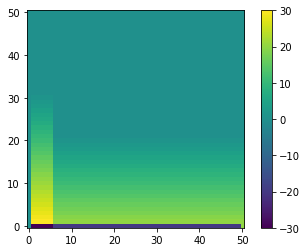

In [26]:
temp = np.zeros_like(U)
temp[HC]=1
for i in range(N_z-1,0,-1):
    temp[:,i-1]+=temp[:,i]
temp[TC]=0
temp[TC]=-temp[TC[0],TC[1]+1] 
# temp[TC]=0
# temp[TC]=-temp[TC[0]+1,TC[1]] 


# for i in range(N_z-1,0,-1):
#     print(i)
#     temp[:,i-1]+=temp[:,i]
plt.imshow(temp.T,origin='lower')
plt.colorbar()


In [27]:
def set_dt(U,W,dx,dz,dt,c_num,err=1e-5):
    dx_u = dx/np.max(U)
    dz_w = dz/np.max(W)
    newdt = min(c_num*dx_u,c_num*dz_w,dt)
    newdt = max(newdt,err)
    return newdt

In [28]:
def NS_solver(U,W,P,F,dt,dx,dz,nu,beta0=1.7,g=9.81,c_num=0.7):
    UC = U.copy()
    WC = W.copy()
    PC = P.copy()
    UCpad = np.pad(UC,((0,1),(0,1)),'constant',constant_values=0)
    WCpad = np.pad(WC,((0,1),(0,1)),'constant',constant_values=0)
    PCpad = np.pad(PC,((0,1),(0,1)),'constant',constant_values=0)
    UUin = (UCpad[1:,:-1] + UCpad[:-1,:-1])/2
    UWUin = (UCpad[:-1,1:] + UCpad[:-1,:-1])/2
    UWWin = (WCpad[1:,:-1] + WCpad[:-1,:-1])/2
    UU = (1/dx)*(((UUin[1:,:])**2-(UUin[:-1,:]))**2)[:,1:]
    UW = (1/dz)*((((UWWin*UWUin)[:,1:])**2-((UWWin*UWUin)[:,:-1])**2))[1:,:]
    PU = (1/dx)*((PCpad[1:,:-1]-PCpad[:-1,:-1]))[1:,1:]
    VISUX = (nu/(dx*dx))*(UCpad[2:,:-1]-2*UCpad[1:-1,:-1]+UCpad[:-2,:-1])[:,1:]
    VISUZ = (nu/(dz*dz))*(UCpad[:-1,2:]-2*UCpad[:-1,1:-1]+UCpad[:-1,:-2])[1:,:]
    
    WWin = (WCpad[:-1,1:] + WCpad[:-1,:-1])/2
    WUUin = (UCpad[:-1,1:] + UCpad[:-1,:-1])/2
    WUWin = (WCpad[1:,:-1] + WCpad[:-1,:-1])/2
    WU = (1/dx)*((((UWWin*UWUin)[1:,:])**2-((UWWin*UWUin)[:-1,:])**2))[:,1:]
    WW = (1/dx)*(((WWin[:,1:])**2-(WWin[:,:-1]))**2)[1:,:]
    PW = (1/dz)*((PCpad[:-1,1:]-PCpad[:-1,:-1]))[1:,1:]
    VISWX = (nu/(dx*dx))*(WCpad[2:,:-1]-2*WCpad[1:-1,:-1]+WCpad[:-2,:-1])[:,1:]
    VISWZ = (nu/(dz*dz))*(WCpad[:-1,2:]-2*WCpad[:-1,1:-1]+WCpad[:-1,:-2])[1:,:]
    
    UC[1:,1:]  = UC[1:,1:] + dt*(-UU-UW-PU+VISUX+VISUZ)
    WC[1:,1:]  = WC[1:,1:] + dt*(-WW-WU-PW+VISWX+VISWZ-g)
    
    D = -(1/dx)*(UC[1:,1:]-UC[:-1,1:]) + (1/dz)*(WC[1:,1:]-WC[1:,:-1])
    beta = beta0/(2*dt*(1/(dx*dx) + 1/(dz*dz)))
    dP = beta*D
    dPpad = np.pad(dP,((0,1),(0,1)),'constant',constant_values=0)
    UC[1:,1:] = UC[1:,1:] - (dt/dx)*(dPpad[1:,:-1]-dPpad[:-1,:-1])
    WC[1:,1:] = WC[1:,1:] - (dt/dz)*(dPpad[:-1,1:]-dPpad[:-1,:-1])
    PC[1:,1:] = PC[1:,1:] + dP
    
    UC[TC]=-UC[TC[0],TC[1]+1] 
    UC[TC]=0

    WC[TC]=-WC[TC[0]+1,TC[1]] 
    WC[TC]=0
    
    
    dx_u = dx/np.max(np.abs(UC))
    dz_w = dz/np.max(np.abs(WC))
    dt = min(c_num*dx_u,c_num*dz_w,dt)
    dt = max(newdt,1e-8)
    return UC,WC,PC,dt
    

In [29]:
UC = U.copy()
WC = W.copy()
PC = P.copy()
UCpad = np.pad(UC,((0,1),(0,1)),'constant',constant_values=0)
WCpad = np.pad(WC,((0,1),(0,1)),'constant',constant_values=0)
PCpad = np.pad(PC,((0,1),(0,1)),'constant',constant_values=0)
UUin = (UCpad[1:,:-1] + UCpad[:-1,:-1])/2
UWUin = (UCpad[:-1,1:] + UCpad[:-1,:-1])/2
UWWin = (WCpad[1:,:-1] + WCpad[:-1,:-1])/2
UU = (1/dx)*(((UUin[1:,:])**2-(UUin[:-1,:]))**2)[:,1:]
UW = (1/dz)*((((UWWin*UWUin)[:,1:])**2-((UWWin*UWUin)[:,:-1])**2))[1:,:]
PU = (1/dx)*((PCpad[1:,:-1]-PCpad[:-1,:-1]))[1:,1:]
VISUX = (nu/(dx*dx))*(UCpad[2:,:-1]-2*UCpad[1:-1,:-1]+UCpad[:-2,:-1])[:,1:]
VISUZ = (nu/(dz*dz))*(UCpad[:-1,2:]-2*UCpad[:-1,1:-1]+UCpad[:-1,:-2])[1:,:]
WWin = (WCpad[:-1,1:] + WCpad[:-1,:-1])/2
WUUin = (UCpad[:-1,1:] + UCpad[:-1,:-1])/2
WUWin = (WCpad[1:,:-1] + WCpad[:-1,:-1])/2
WU = (1/dx)*((((UWWin*UWUin)[1:,:])**2-((UWWin*UWUin)[:-1,:])**2))[:,1:]
WW = (1/dx)*(((WWin[:,1:])**2-(WWin[:,:-1]))**2)[1:,:]

PW = (1/dz)*((PCpad[:-1,1:]-PCpad[:-1,:-1]))[1:,1:]
VISWX = (nu/(dx*dx))*(WCpad[2:,:-1]-2*WCpad[1:-1,:-1]+WCpad[:-2,:-1])[:,1:]
VISWZ = (nu/(dz*dz))*(WCpad[:-1,2:]-2*WCpad[:-1,1:-1]+WCpad[:-1,:-2])[1:,:]

UC[1:,1:]  = UC[1:,1:] + dt*(-UU-UW-PU+VISUX+VISUZ)
WC[1:,1:]  = WC[1:,1:] + dt*(-WW-WU-PW+VISWX+VISWZ-g)

D = -(1/dx)*(UC[1:,1:]-UC[:-1,1:]) + (1/dz)*(WC[1:,1:]-WC[1:,:-1])
beta = beta0/(2*dt*(1/(dx*dx) + 1/(dz*dz)))
dP = beta*D
dPpad = np.pad(dP,((0,1),(0,1)),'constant',constant_values=0)
UC[1:,1:] = UC[1:,1:] - (dt/dx)*(dPpad[1:,:-1]-dPpad[:-1,:-1])
WC[1:,1:] = WC[1:,1:] - (dt/dz)*(dPpad[:-1,1:]-dPpad[:-1,:-1])
PC[1:,1:] = PC[1:,1:] + dP

UC[TC]=-UC[TC[0],TC[1]+1] 
UC[TC]=0

WC[TC]=-WC[TC[0]+1,TC[1]] 
WC[TC]=0
MAXW = np.max(np.abs(WC))
MAXU = np.max(np.abs(UC))
dx_u = dx/MAXU
dz_w = dz/MAXW
newdt = min(0.7*dx_u,0.7*dz_w,dt)
newdt = max(newdt,1e-8)
print(newdt)
# dPx.shape
# UC.shape

0.002


In [30]:
Unew,Wnew,Pnew,newdt = NS_solver(U,W,P,F,dt,dx,dz,nu,beta0=1.7,g=9.81,c_num=0.7)

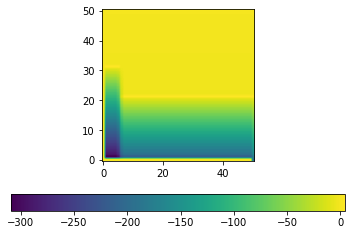

In [31]:
plt.imshow(Pnew.T,origin='lower')
plt.colorbar(orientation='horizontal')


In [32]:
T_list =[]

C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\230166934.py:11: RuntimeWarning: overflow encountered in square
  UU = (1/dx)*(((UUin[1:,:])**2-(UUin[:-1,:]))**2)[:,1:]
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\230166934.py:12: RuntimeWarning: overflow encountered in square
  UW = (1/dz)*((((UWWin*UWUin)[:,1:])**2-((UWWin*UWUin)[:,:-1])**2))[1:,:]
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\230166934.py:12: RuntimeWarning: invalid value encountered in subtract
  UW = (1/dz)*((((UWWin*UWUin)[:,1:])**2-((UWWin*UWUin)[:,:-1])**2))[1:,:]
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\230166934.py:20: RuntimeWarning: overflow encountered in square
  WU = (1/dx)*((((UWWin*UWUin)[1:,:])**2-((UWWin*UWUin)[:-1,:])**2))[:,1:]
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\230166934.py:20: RuntimeWarning: invalid value encountered in subtract
  WU = (1/dx)*((((UWWin*UWUin)[1:,:])**2-((UWWin*UWUin)[:-1,:])**2))[:,1:]
C:\Users\kim9y\AppData\Local\Temp\ipykernel_35004\230166934

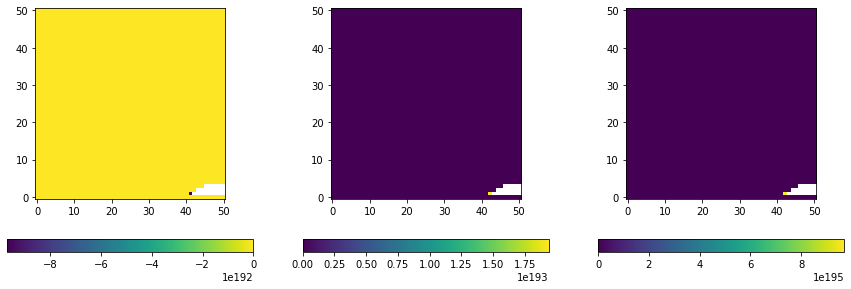

In [36]:
for i in range(10):
    T_list.append(newdt)
    Unew,Wnew,Pnew, newdt = NS_solver(Unew,Wnew,Pnew,F,newdt,dx,dz,nu,1e-6,c_num=0.7)

plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(Unew.T,origin='lower')
plt.colorbar(orientation="horizontal")
plt.subplot(132)
plt.imshow(Wnew.T,origin='lower')
plt.colorbar(orientation="horizontal")
plt.subplot(133)
plt.imshow(Pnew.T,origin='lower')
plt.colorbar(orientation="horizontal")

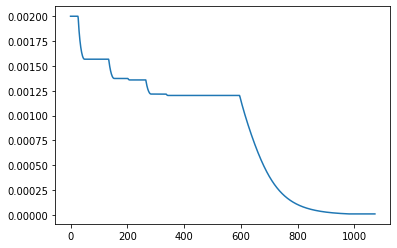

In [413]:
plt.plot(T_list)